In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lectura y exploración de los datos

In [3]:
datos = pd.read_csv('C:\\Users\\Cosas\\OneDrive\\Escritorio\\ESTADISTICA\\MINERIA DE DATOS\\trabajo clasificacion\\IBM.csv')
datos

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


El dataset usado es un dataset de empleados de IBM y fue creado para obtener información e intentar predecir si un empleado va a sufrir 'attrition' (desgaste) en su trabajo.
Empezaremos haciendo una breve exploración de los datos.

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


Observamos que no hay ningún dato faltante y que algunas variables son numéricas y otras categóricas. Para trabajar con variables categóricas las vamos a convertir en dummys para tratarlas de forma numérica. Pero primero vamos a ver la distribución de las variables.

In [5]:
def graficar(columns):
    for col in columns:
        plt.figure(figsize=(7, 5))
        colord = pd.DataFrame(datos[col].value_counts().sort_index())
        valores = list(colord.index)
        frecuencia = colord.values.flatten().tolist()
        plt.bar(valores, frecuencia)
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

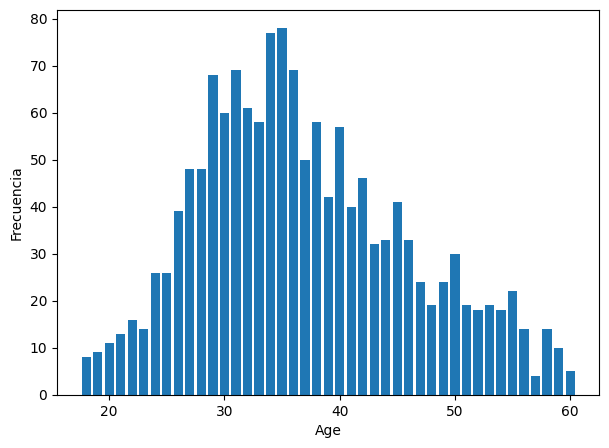

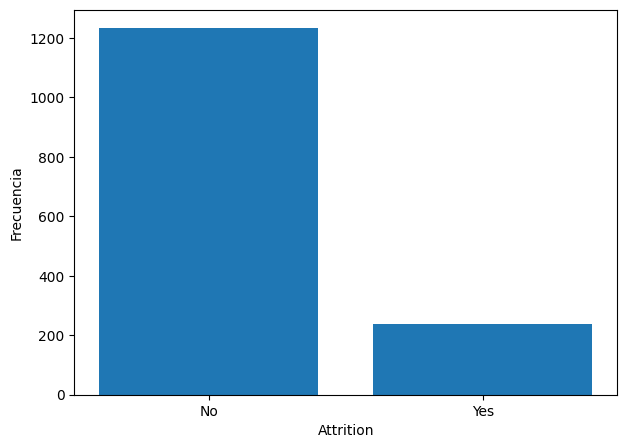

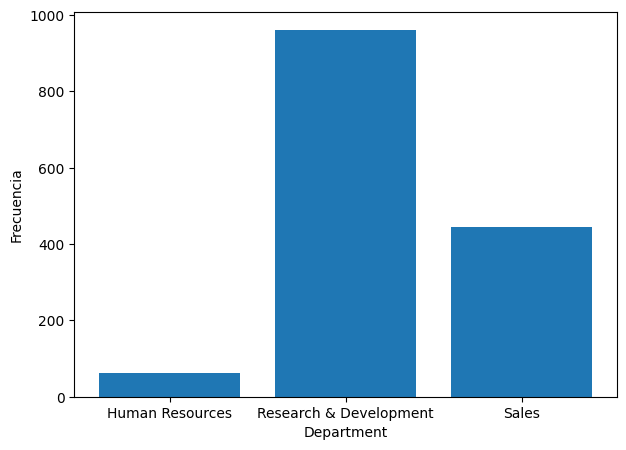

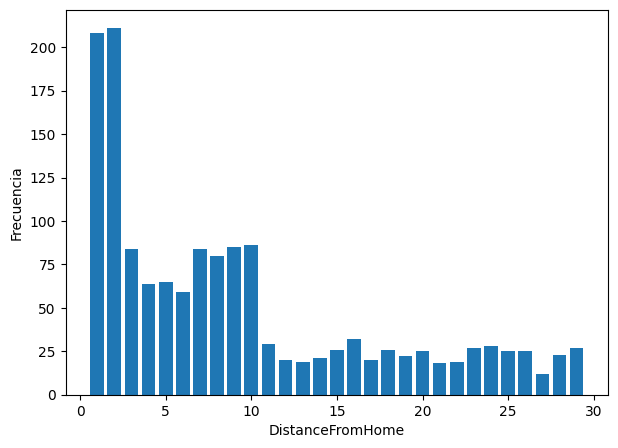

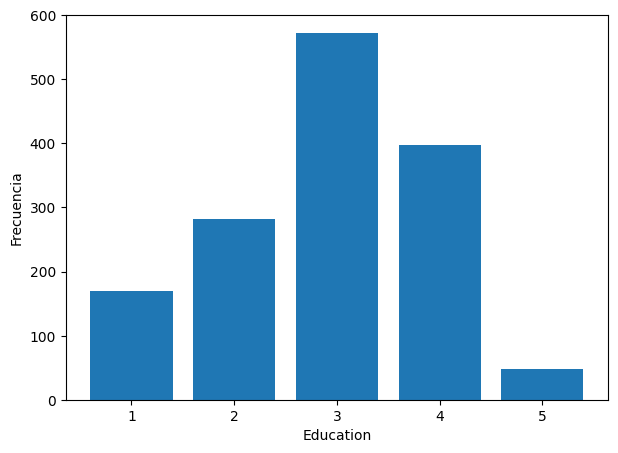

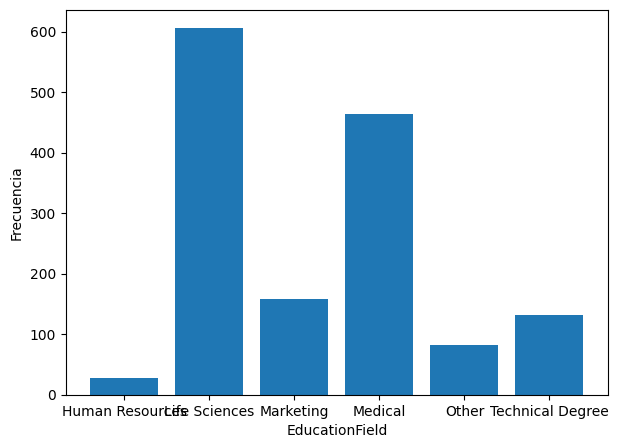

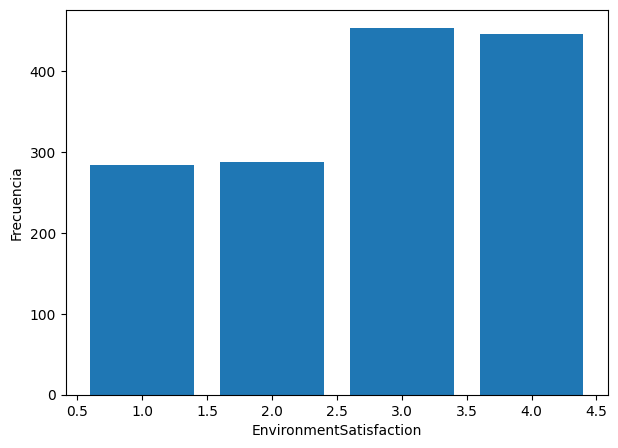

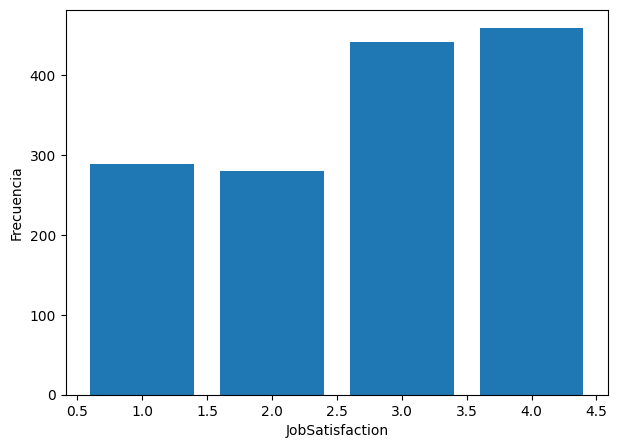

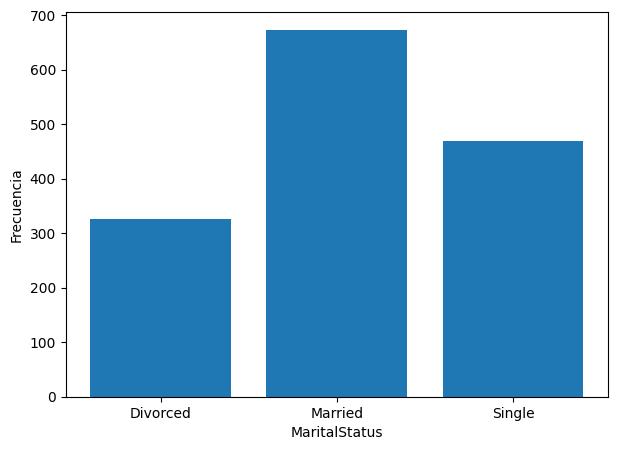

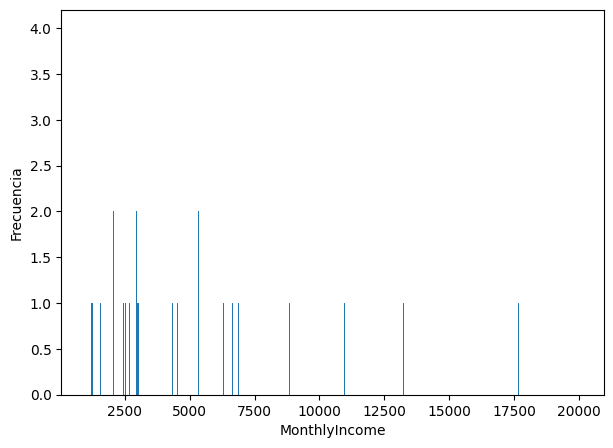

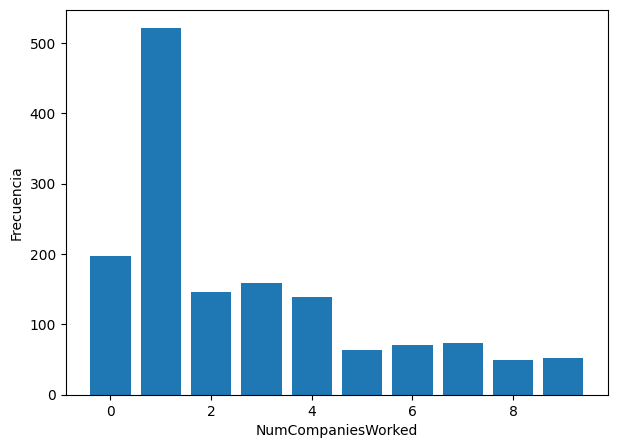

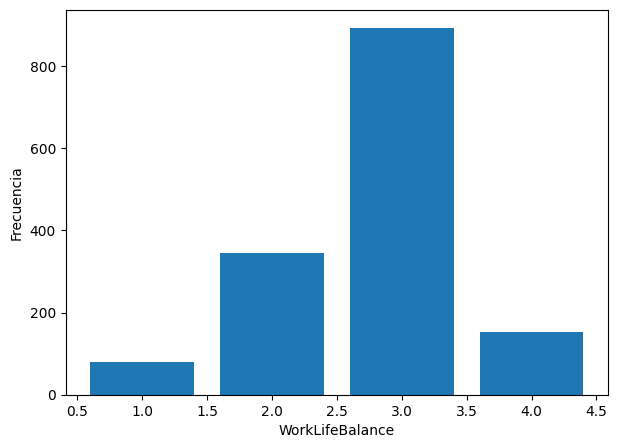

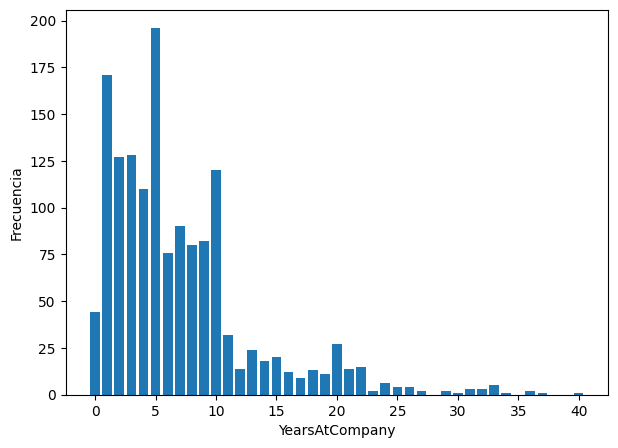

In [6]:
graficar(datos.columns)

In [7]:
datos.isna().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

No hay ningún dato faltante en el dataset asi que no hace falta hacer ningún tipo de imputación.

# Procesamiento de los datos

In [8]:
datos['Attrition'] = datos['Attrition'].replace({'Yes' : 1, 'No' : 0})

In [9]:
vars_cat = ['Department', 'EducationField', 'MaritalStatus']
def dummies(data, columnas):
    for col in columnas:
        data = pd.concat([data, pd.get_dummies(data[col], dtype = 'int')], axis=1)
        data.drop(col, axis=1, inplace=True)
    return data
        

In [10]:
datos = dummies(datos, vars_cat)

In [11]:
nombres_vars = datos.columns.tolist()
nombres_vars

['Age',
 'Attrition',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'WorkLifeBalance',
 'YearsAtCompany',
 'Human Resources',
 'Research & Development',
 'Sales',
 'Human Resources',
 'Life Sciences',
 'Marketing',
 'Medical',
 'Other',
 'Technical Degree',
 'Divorced',
 'Married',
 'Single']

Primero dividimos el dataset en X_train, X_test, y_train, y_test y escalamos los datos.

In [12]:
from sklearn.model_selection import train_test_split
X = datos.iloc[:, 2:].values
y = datos.iloc[:,1:2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)
y_train = np.ravel(y_train)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train  = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# datos_sc = pd.DataFrame(datos_sc, columns= nombres_vars)

# Algoritmo KNN para clasificación.

Probamos el algoritmo KNN para una primera observación de cómo funciona el modelo de forma estándar.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = classifier.predict(X_test)

Importamos algunas funciones para obtener métricas y creo funciones para calcular el accuracy y para hacer una gráfica del área bajo la curva ROC. 

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

def calc_accuracy(confusion):
    r = np.diag(confusion).sum() / confusion.sum()
    return r

def plot_auc(y_test, y_pred):
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('La accuracy con k = 5 es: ', calc_accuracy(confusion_matrix(y_test, y_pred)))

[[245  11]
 [ 33   5]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       256
           1       0.31      0.13      0.19        38

    accuracy                           0.85       294
   macro avg       0.60      0.54      0.55       294
weighted avg       0.81      0.85      0.82       294

La accuracy con k = 5 es:  0.8503401360544217


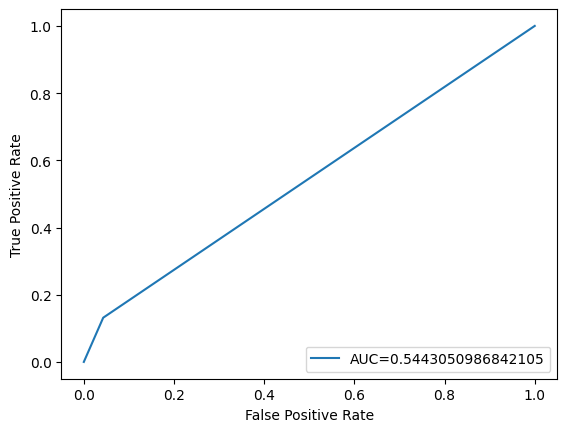

In [17]:
plot_auc(y_test, y_pred)

In [18]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

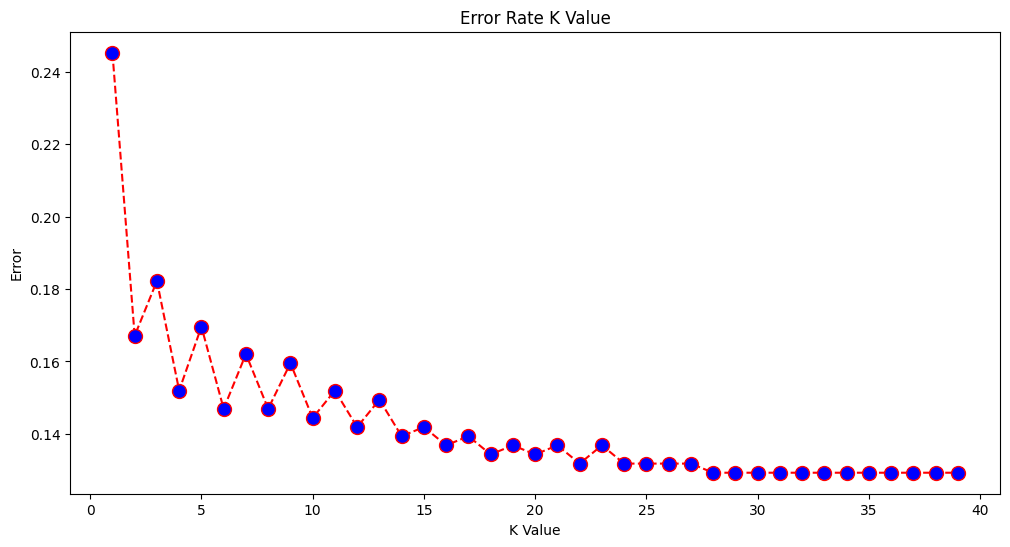

In [19]:
plt.figure(figsize = (12,6))
plt.plot(range(1,40), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.show()


In [20]:
classifier20 = KNeighborsClassifier(n_neighbors=20)
classifier20.fit(X_train, y_train)
y_pred20 = classifier20.predict(X_test)
print(confusion_matrix(y_test, y_pred20))
print(classification_report(y_test, y_pred20))


[[256   0]
 [ 36   2]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       256
           1       1.00      0.05      0.10        38

    accuracy                           0.88       294
   macro avg       0.94      0.53      0.52       294
weighted avg       0.89      0.88      0.83       294



La accuracy con k = 20 es de:  0.8775510204081632


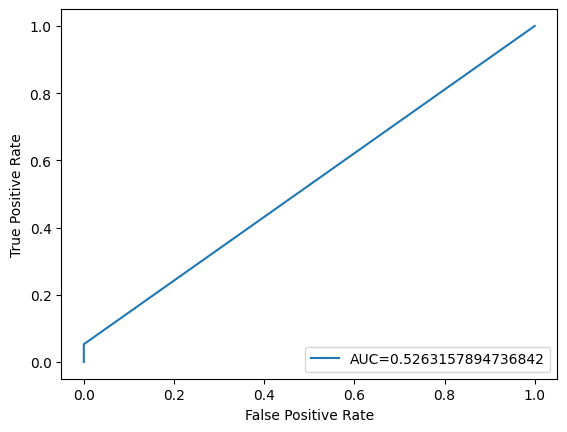

In [21]:
print('La accuracy con k = 20 es de: ', calc_accuracy((confusion_matrix(y_test, y_pred20))))
plot_auc(y_test, y_pred20)

In [22]:
classifier10 = KNeighborsClassifier(n_neighbors=10)
classifier10.fit(X_train, y_train)
y_pred10 = classifier10.predict(X_test)
print(confusion_matrix(y_test, y_pred10))
print(classification_report(y_test, y_pred10))


[[253   3]
 [ 35   3]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       256
           1       0.50      0.08      0.14        38

    accuracy                           0.87       294
   macro avg       0.69      0.53      0.53       294
weighted avg       0.83      0.87      0.83       294



La accuracy con k = 20 es de:  0.8707482993197279


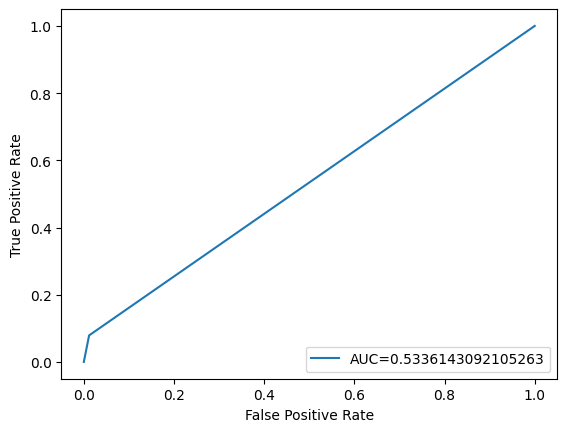

In [23]:
print('La accuracy con k = 20 es de: ', calc_accuracy((confusion_matrix(y_test, y_pred10))))
plot_auc(y_test, y_pred10)

In [24]:
y_pred10

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Ambos modelos clasifican bastante bien, pero observamos que hay muchos valores FN (false negatives). Por otra parte, el área bajo la curva ROC es muy bajo. Esto se debe a que el conjunto de datos está muy desbalanceado y prediciendo por ejemplo, que todas las instancias son 0 ya alcanzaríamos un 83% de accuracy.

# Balanceamos el conjunto de datos mediante la técnica 'random undersampling'

Calculo el número de instancias con Attrition = 1 (que es la clase que no predomina), para usar el mismo número de instancias que contengan Attrition = 0 para que estén balanceadas.

In [25]:
n_yes = (datos['Attrition'] == 1).sum()
#Número de instancias cuya clase a predecir es 1
n_yes 

237

De forma aleatoria, cogemos los 237 instancias con clase 0 y 237 con clase 1. Usamos una seed para que los resultados sean los mismos.

In [26]:
import random
index_0 = list(np.where(datos['Attrition']==0))[0]
index_1 = list(np.where(datos['Attrition']==1))[0]
np.random.seed(999)
indices_aleatorios = np.random.choice(index_0, n_yes, replace=False)

In [27]:
datos_balanceados = datos.loc[indices_aleatorios, :]
datos_balanceados2 = datos.loc[index_1, :]
datos_bc = pd.concat([datos_balanceados, datos_balanceados2])

In [28]:
datos_bc = datos_bc.sample(frac=1)

In [29]:
datos_bc

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,...,Sales,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Divorced,Married,Single
591,33,1,16,3,1,1,5324,5,3,3,...,1,0,0,1,0,0,0,0,0,1
869,46,0,15,2,4,2,19081,5,3,4,...,0,0,1,0,0,0,0,0,1,0
1262,43,1,17,3,3,3,2437,9,3,1,...,0,0,0,0,0,0,1,0,1,0
1050,42,0,9,2,1,4,3673,1,3,12,...,0,0,0,0,1,0,0,0,0,1
1043,53,0,2,3,4,2,16598,4,2,9,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33,1,10,1,1,4,3408,7,3,4,...,0,0,0,0,1,0,0,1,0,0
82,55,0,1,2,1,4,10239,3,3,1,...,1,0,1,0,0,0,0,0,1,0
482,31,1,13,4,2,1,4233,2,1,3,...,1,0,0,0,1,0,0,1,0,0
195,37,0,21,3,2,1,3564,1,2,8,...,0,0,1,0,0,0,0,0,1,0


# Algoritmo KNN con dataset balanceado (undersampling)

Probamos el algoritmo KNN para clasificación con el nuevo dataset balanceado con la técnica random undersampling.

In [30]:
from sklearn.model_selection import train_test_split
X2 = datos_bc.iloc[:, 2:].values
y2 = datos_bc.iloc[:,1:2].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.30, random_state= 101)
y2_train = np.ravel(y2_train)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X2_train)
X2_train  = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

In [32]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X2_train, y2_train)
    pred_i = knn.predict(X2_test)
    error.append(np.mean(pred_i != y_test))

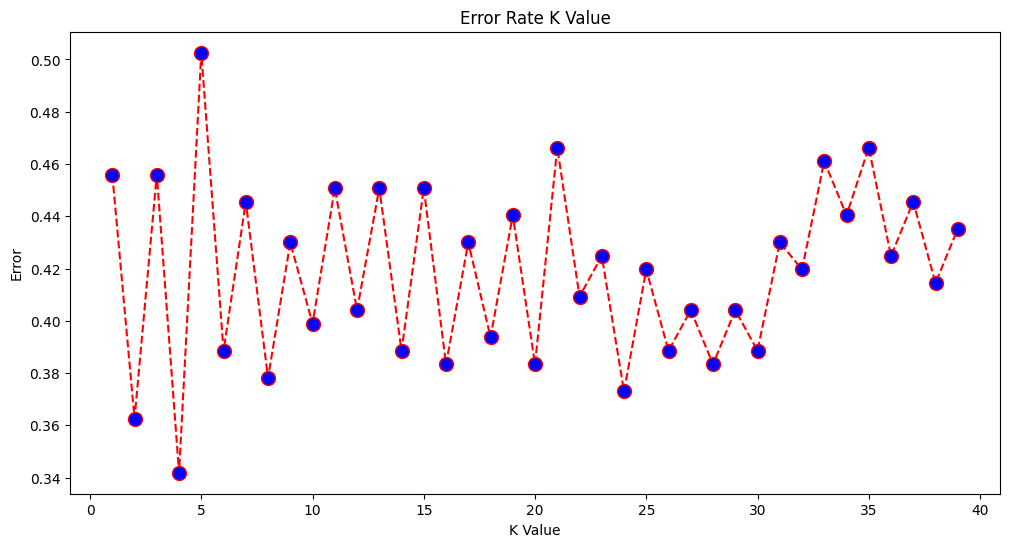

In [33]:
plt.figure(figsize = (12,6))
plt.plot(range(1,40), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.show()


Observamos que k = 4 es el valor de k que menor error tiene y es el que nos vamos a quedar para hacer la prueba de cómo funciona el modelo con los datos balanceados usando esta técnica.

In [34]:
classifier2 = KNeighborsClassifier(n_neighbors=4)
classifier2.fit(X2_train, y2_train)
y2_pred2 = classifier2.predict(X2_test)
print(confusion_matrix(y2_test, y2_pred2))
print(classification_report(y2_test, y2_pred2))


[[58 18]
 [44 23]]
              precision    recall  f1-score   support

           0       0.57      0.76      0.65        76
           1       0.56      0.34      0.43        67

    accuracy                           0.57       143
   macro avg       0.56      0.55      0.54       143
weighted avg       0.57      0.57      0.55       143



La accuracy con k = 4 (mejor k) y el dataset balanceado es de: 0.5664335664335665


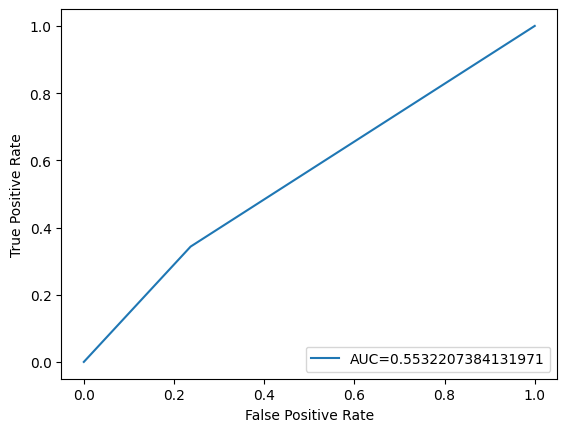

In [35]:
print('La accuracy con k = 4 (mejor k) y el dataset balanceado es de:', calc_accuracy((confusion_matrix(y2_test, y2_pred2))))
plot_auc(y2_test, y2_pred2)

El hecho de quedarnos de forma aleatoria con unos datos u otros puede ocasionar pérdida de información, sesgo de la muestra y riesgo de eliminar información útil. He podido comprobar que según la seed, la métrica accuracy puede variar desde 53 hasta 65 porciento.

# Balancear dataset con técnica SMOTE oversampling

Vamos a usar otra técnica para balancear los datos, llamada SMOTE oversampling. Esta vez en vez de coger sólo el número de instancias que tiene la clase no predominante, lo que hacemos es crear nuevas instancias sintéticas parecidas a los datos que ya tenemos hasta completar el mismo número de instancias por clase.

In [36]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

In [37]:
Xo_train, Xo_test, yo_train, yo_test = train_test_split(X, y, test_size = 0.3, random_state=123)
yo_train = np.ravel(yo_train)

In [38]:
counter = Counter(yo_train)
counter

Counter({0: 849, 1: 180})

In [39]:
oversample = SMOTE()
Xo_train, yo_train = oversample.fit_resample(Xo_train, yo_train)
counter = Counter(yo_train)
counter

Counter({0: 849, 1: 849})

# KNN con dataset balanceado con SMOTE oversampling

Vamos a usar esta variación del dataset original, y calculamos los errores según k de 1 a 50 para quedarnos con el mejor k.

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xo_train)
Xo_train  = scaler.transform(Xo_train)
Xo_test = scaler.transform(Xo_test)

In [41]:
error = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xo_train, yo_train)
    pred_i = knn.predict(Xo_test)
    error.append(np.mean(pred_i != yo_test))

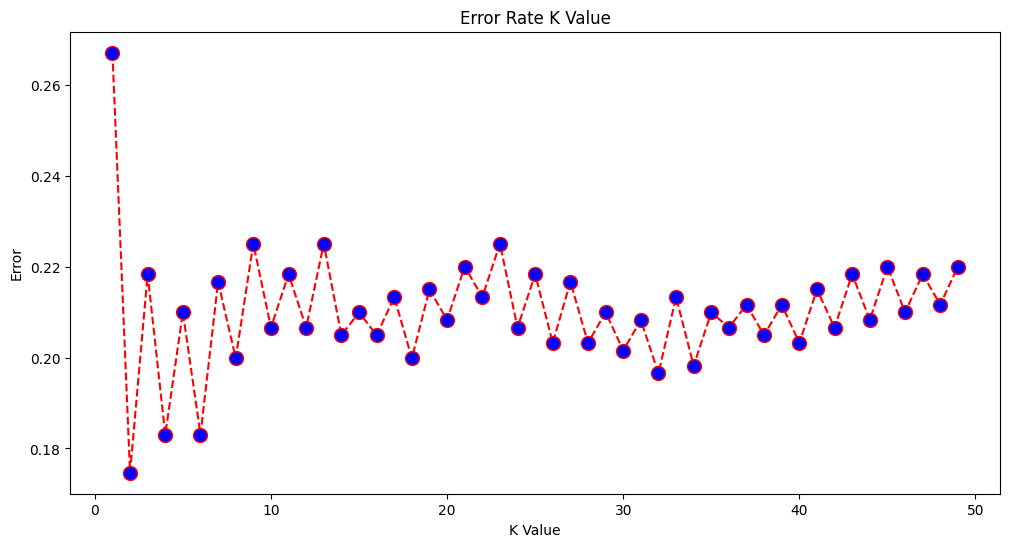

In [42]:
plt.figure(figsize = (12,6))
plt.plot(range(1,50), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.show()

Nos quedamos con el k=2 y aplicamos el algoritmo KNN para visualizar las métricas.

In [43]:
classifier_o= KNeighborsClassifier(n_neighbors=2)
classifier_o.fit(Xo_train, yo_train)
yo_pred = classifier_o.predict(Xo_test)
print(confusion_matrix(yo_test, yo_pred))
print(classification_report(yo_test, yo_pred))
calc_accuracy(confusion_matrix(yo_test, yo_pred))

[[366  18]
 [ 48   9]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       384
           1       0.33      0.16      0.21        57

    accuracy                           0.85       441
   macro avg       0.61      0.56      0.57       441
weighted avg       0.81      0.85      0.83       441



0.8503401360544217

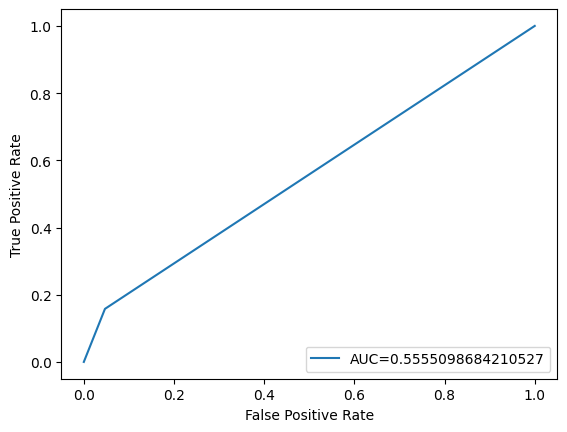

In [44]:
fpr, tpr, _ = metrics.roc_curve(yo_test,  yo_pred)
auc = metrics.roc_auc_score(yo_test, yo_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


# Stratified K-Fold
Utilizamos un método de validación cruzada con cada una de las técnicas de balance del dataset para así evaluar y seleccionar el mejor modelo.

## Stratified K-Fold con random undersampling

In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = []
mean_accuracy = []

for k in range(1, 60):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    skf = StratifiedKFold(n_splits=5)
    
    for train_index, test_index in skf.split(X2, y2):
        X2_train, X2_test = X2[train_index], X2[test_index]
        y2_train, y2_test = y2[train_index], y2[test_index]
        y2_train = np.ravel(y2_train)

        knn.fit(X2_train, y2_train)

        y2_pred = knn.predict(X2_test)

        accuracy = accuracy_score(y2_test, y2_pred)
        accuracy_scores.append(accuracy)

    mean_accuracy.append(sum(accuracy_scores) / len(accuracy_scores))

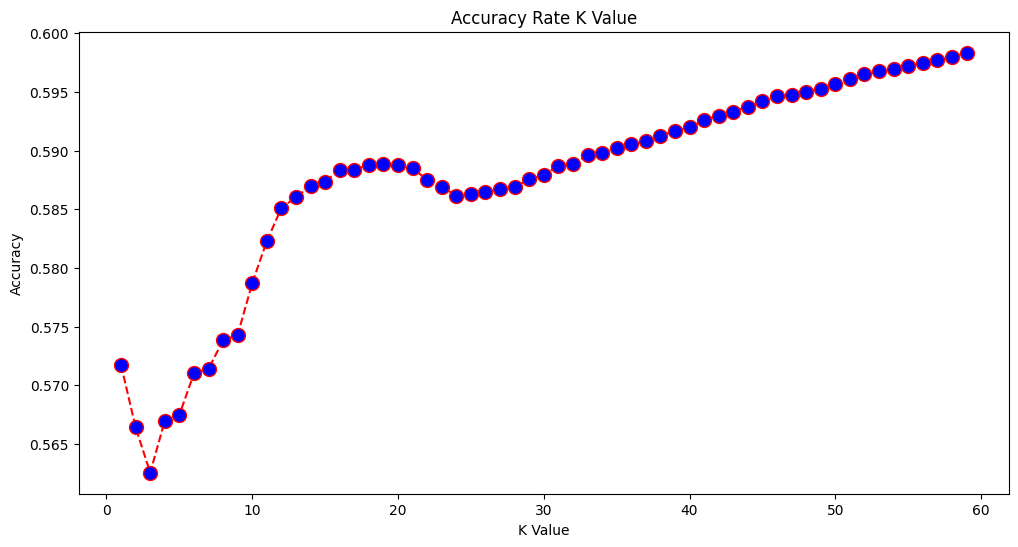

In [46]:
plt.figure(figsize = (12,6))
plt.plot(range(1,60), mean_accuracy, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = []
mean_accuracy = []
knn = KNeighborsClassifier(n_neighbors=60)
skf = StratifiedKFold(n_splits=5)
    
for train_index, test_index in skf.split(X2, y2):
    X2_train, X2_test = X2[train_index], X2[test_index]
    y2_train, y2_test = y2[train_index], y2[test_index]
    y2_train = np.ravel(y2_train)
    knn.fit(X2_train, y2_train)
    y2_pred = knn.predict(X2_test)

    accuracy = accuracy_score(y2_test, y2_pred)
    accuracy_scores.append(accuracy)
print(np.mean(accuracy_scores))

confusion_matrix(y2_test, y2_pred)

0.6160806270996642


array([[32, 15],
       [19, 28]], dtype=int64)

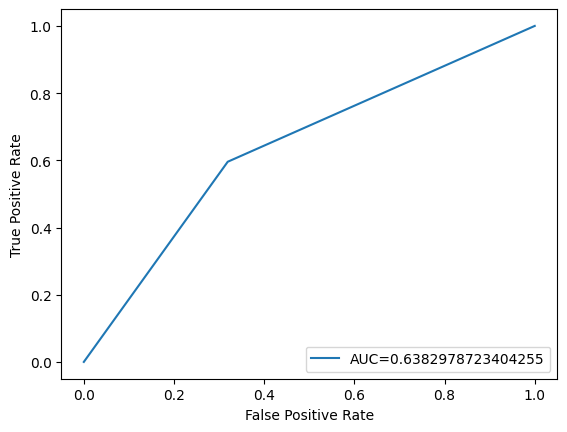

In [48]:
plot_auc(y2_test, y2_pred)

# Stratified k-fold con oversampling

In [49]:
Xo = np.concatenate((Xo_train, Xo_test), axis = 0)
yo_test = np.ravel(yo_test)
yo = np.concatenate((yo_train, yo_test))

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = []
mean_accuracy = []

for k in range(1, 60):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    skf = StratifiedKFold(n_splits=5)
    
    for train_index, test_index in skf.split(Xo, yo):
        Xo_train, Xo_test = Xo[train_index], Xo[test_index]
        yo_train, yo_test = yo[train_index], yo[test_index]
        yo_train = np.ravel(yo_train)

        knn.fit(Xo_train, yo_train)

        yo_pred = knn.predict(Xo_test)

        accuracy = accuracy_score(yo_test, yo_pred)
        accuracy_scores.append(accuracy)

    mean_accuracy.append(sum(accuracy_scores) / len(accuracy_scores))

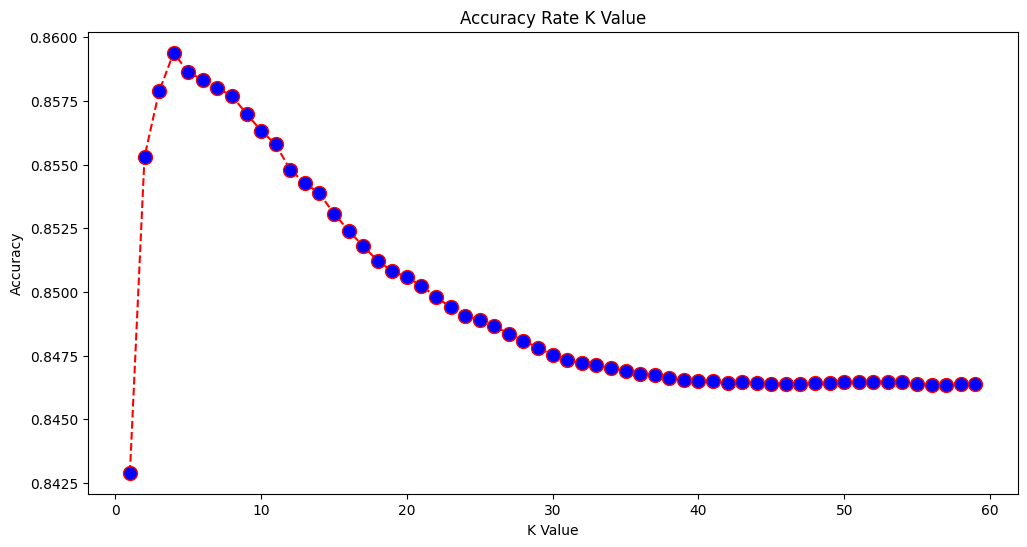

In [51]:
plt.figure(figsize = (12,6))
plt.plot(range(1,60), mean_accuracy, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = []
mean_accuracy = []
knn = KNeighborsClassifier(n_neighbors=4)
skf = StratifiedKFold(n_splits=5)
    
for train_index, test_index in skf.split(Xo, yo):
    Xo_train, Xo_test = Xo[train_index], Xo[test_index]
    yo_train, yo_test = yo[train_index], yo[test_index]
    yo_train = np.ravel(yo_train)
    knn.fit(Xo_train, yo_train)
    yo_pred = knn.predict(Xo_test)

    accuracy = accuracy_score(yo_test, yo_pred)
    accuracy_scores.append(accuracy)
print(np.mean(accuracy_scores))

print(confusion_matrix(yo_test, yo_pred))
print(classification_report(yo_test, yo_pred))

0.8639497472039223
[[239   7]
 [ 56 125]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       246
           1       0.95      0.69      0.80       181

    accuracy                           0.85       427
   macro avg       0.88      0.83      0.84       427
weighted avg       0.87      0.85      0.85       427



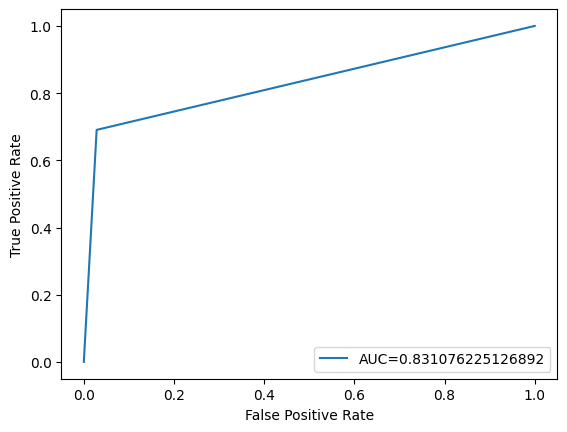

In [53]:
plot_auc(yo_test, yo_pred)

Este último modelo es el que mejor resultados nos ha arrojado, con un valor de accuracy de 0.8639 y un área bajo la curva ROC de 0.831

# Ajuste de hiperparámetros del mejor modelo

Por último, vamos a realizar una búsqueda de los mejores hiperparámetros de nuestro mejor modelo usando la función GridSearchCV

In [54]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a probar
param_grid = {
    'n_neighbors': [2, 4, 10, 20, 40],  # Valores a probar para el número de vecinos
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50, 100]
}

# Crear una instancia del modelo KNN
knn = KNeighborsClassifier()

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(Xo, yo)

# Obtener los resultados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)


Mejores hiperparámetros encontrados: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 2, 'weights': 'uniform'}
Mejor puntuación de validación cruzada: 0.8676847818949855


# Modelo final

In [55]:
classifier = KNeighborsClassifier(n_neighbors=2, algorithm = 'auto', weights = 'uniform', leaf_size = 10)
classifier.fit(Xo_train, yo_train)
y_pred = classifier.predict(Xo_test)
print(confusion_matrix(yo_test, yo_pred))
print(classification_report(yo_test, yo_pred))


[[239   7]
 [ 56 125]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       246
           1       0.95      0.69      0.80       181

    accuracy                           0.85       427
   macro avg       0.88      0.83      0.84       427
weighted avg       0.87      0.85      0.85       427



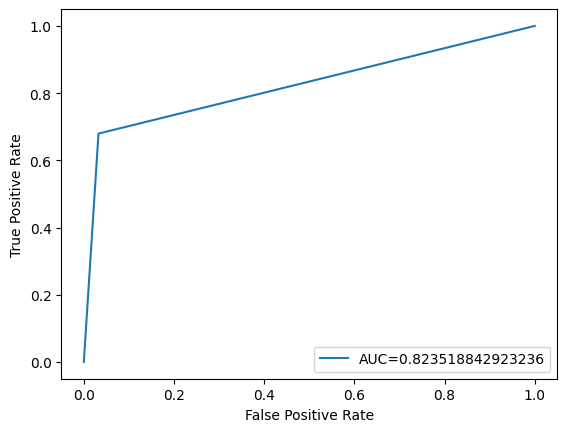

In [56]:
plot_auc(yo_test, y_pred)
